# Visualizing Ford GoBike System Data
# by Kareem Beltagy

# introduction:
In this dataset we  go through  the Ford GoBike System Data which  represents the data of a bike-sharing company. This  dataset originally contains 16  columns. The data set needs  to be cleaned  and explored by visuas.

# data gathering  and assessing 

In [1]:
#importing the necessary libraries  and  reading the data 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
bikes=pd.read_csv('fordbike.csv')
bikes.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [2]:
# showing the data  info 
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [3]:
# checking  for  duplicated   values
bikes.duplicated().sum()

0

In [4]:
#checking  for Null values
bikes.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

# data  cleansing 

In [5]:
#data cleansing
#problem: having missing values
#solution: dropping  all the  nulls
bikes.dropna(inplace=True)
bikes.isnull().sum().sum()

0

In [6]:
#problem: changing the data type of  some columns  to the  right  type
#making  copy of the dataset  first 
bikes1=bikes.copy()
#changing the  start and  end times  to  type datetime
bikes1['start_time'] = pd.to_datetime(bikes1['start_time'])
bikes1['end_time'] = pd.to_datetime(bikes1['end_time'])

#changing the  user  type and member  gender into  type category  to be  easy  to  visualize later
bikes1['user_type'] = bikes1['user_type'].astype('category')
bikes1['member_gender'] = bikes1['member_gender'].astype('category')


In [7]:
#problem: adding  new data  columns to the  data frame
bikes1['duration_min']=bikes1['duration_sec']/60
bikes1['age']=2021-bikes1['member_birth_year']
bikes1['age']=bikes1['age'].astype('int')
bikes1.head()


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,869.750000,37
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,1030.900000,49
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,608.166667,32
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,26.416667,47
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,29.883333,62


In [8]:
# adding  new  columns  of the start hour, day, month
bikes1['start_date'] = bikes1.start_time.dt.strftime('%Y-%m-%d')
bikes1['start_hour'] = bikes1.start_time.dt.strftime('%H')
bikes1['start_day'] = bikes1.start_time.dt.strftime('%A')
bikes1['start_month'] = bikes1.start_time.dt.strftime('%B')

In [9]:
bikes1['end_date'] = bikes1.end_time.dt.strftime('%Y-%m-%d')
bikes1['end_hour'] = bikes1.end_time.dt.strftime('%H')
bikes1['end_day'] = bikes1.end_time.dt.strftime('%A')
bikes1['end_month'] = bikes1.end_time.dt.strftime('%B')

In [10]:
bikes1['start_station_name'].describe()

count                   174952
unique                     329
top       Market St at 10th St
freq                      3649
Name: start_station_name, dtype: object

# Univariate  exploration

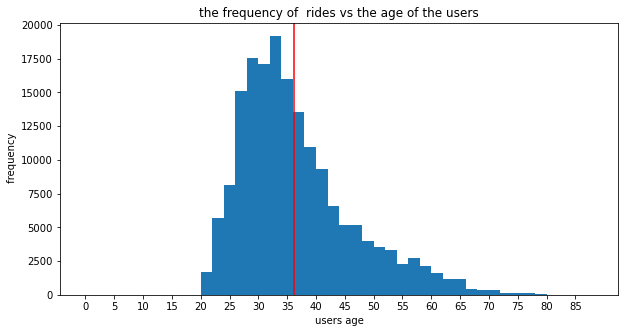

In [11]:
#checking the  users  age  distribution
plt.figure(figsize=(10,5))
bins=np.arange(0,90,2)
ticks=np.arange(0,90,5)
color=sb.color_palette()[0]
plt.hist(data=bikes1,x='age',color=color,bins=bins)
plt.axvline(bikes1['age'].mean(),color='r')
plt.xticks(ticks)
plt.xlabel('users age')
plt.ylabel(' frequency')
plt.title('the frequency of  rides vs the age of the users');



 as shown in the  histogram, most of the users who had   bike rides  are between  25  and  35  years old, and  the elder the users the  less  rides they have. Thus,  the age is strongly affects the  number of the rides

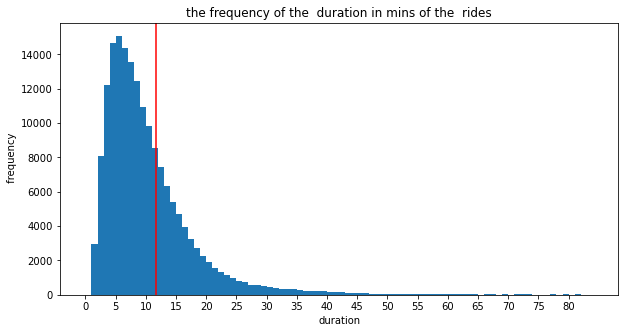

In [12]:
#showing the frequency of the  duration in mins of the  rides
plt.figure(figsize=(10,5))
bins=np.arange(0,85,1)
ticks=np.arange(0,85,5)
color=sb.color_palette()[0]
plt.hist(data=bikes1,x='duration_min',color=color,bins=bins)
plt.axvline(bikes1['duration_min'].mean(),color='r')
plt.xticks(ticks)
plt.xlabel('duration')
plt.ylabel(' frequency')
plt.title('the frequency of the  duration in mins of the  rides');

as shown  above,most of the bike trips' duration lies between the  5  and  10 mins.

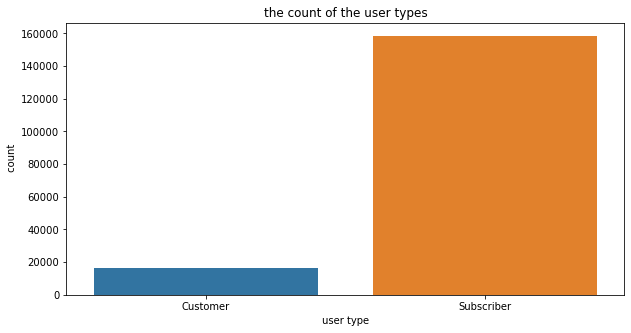

In [13]:
#the count of the user types
plt.figure(figsize=(10,5))
sb.countplot(data=bikes1, x='user_type')
plt.xlabel('user type')
plt.ylabel(' count')
plt.title('the count of the user types');

most  of the users  are of the  subscribers  type 


Text(0.5, 1.0, 'the percentage of the users based on their type')

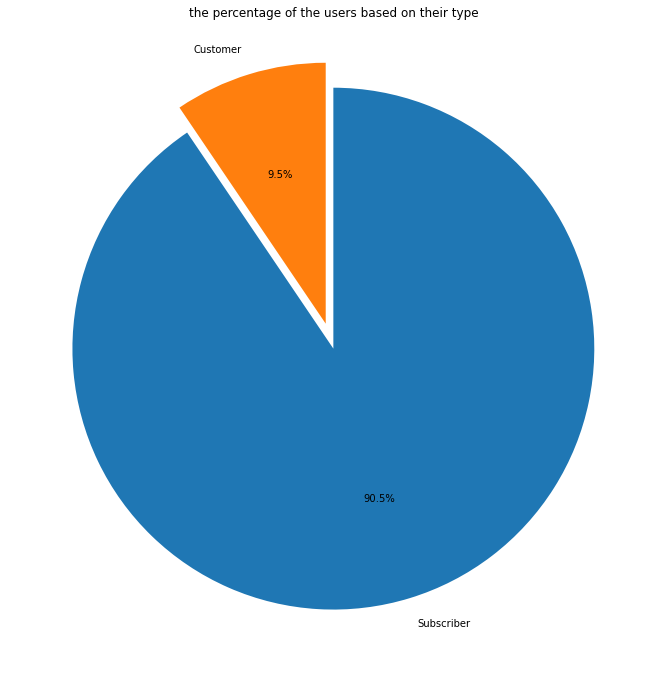

In [14]:
#piechart  to show the percentage of the trips made based on  the  user type, either  customer or  subscriber
plt.figure(figsize=(12,12))
sorted_counts = bikes1['user_type'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False,autopct='%1.1f%%', explode=(0, 0.1));
plt.title('the percentage of the users based on their type')

most  of the users  are of the  subscribers  type  with less than  10 percent  of the customer  type


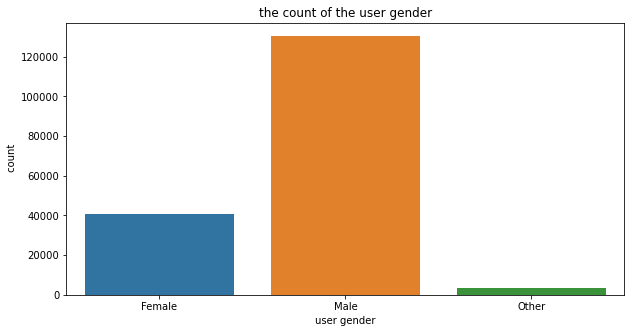

In [15]:
# the  total trips made based on gender
plt.figure(figsize=(10,5))
sb.countplot(data=bikes1, x='member_gender')
plt.xlabel('user gender')
plt.ylabel(' count')
plt.title('the count of the user gender');

most of the  users who made  trips with  nearly  75 percentage  are males 

Text(0.5, 1.0, 'the percentage of the users based on their gender')

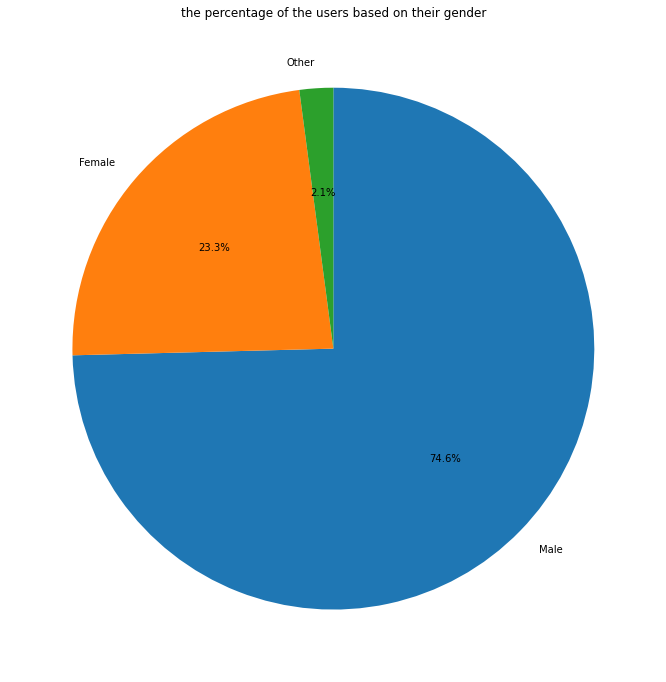

In [16]:
#pie  chart of the  percentage of the users who made trips based on their gender
plt.figure(figsize=(12,12))
sorted_counts = bikes1['member_gender'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False,autopct='%1.1f%%', explode=(0, 0, 0));
plt.title('the percentage of the users based on their gender')


In [17]:
biky=bikes1.sort_values(['start_station_name'], ascending=False).groupby('start_station_name').head(10)
biky.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3264 entries, 138297 to 53195
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   duration_sec             3264 non-null   int64         
 1   start_time               3264 non-null   datetime64[ns]
 2   end_time                 3264 non-null   datetime64[ns]
 3   start_station_id         3264 non-null   float64       
 4   start_station_name       3264 non-null   object        
 5   start_station_latitude   3264 non-null   float64       
 6   start_station_longitude  3264 non-null   float64       
 7   end_station_id           3264 non-null   float64       
 8   end_station_name         3264 non-null   object        
 9   end_station_latitude     3264 non-null   float64       
 10  end_station_longitude    3264 non-null   float64       
 11  bike_id                  3264 non-null   int64         
 12  user_type                326

In [18]:
bikes1.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,duration_min,age,start_date,start_hour,start_day,start_month,end_date,end_hour,end_day,end_month
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,869.750000,37,2019-02-28,17,Thursday,February,2019-03-01,08,Friday,March
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,1030.900000,49,2019-02-28,12,Thursday,February,2019-03-01,05,Friday,March
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,608.166667,32,2019-02-28,17,Thursday,February,2019-03-01,04,Friday,March
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,26.416667,47,2019-02-28,23,Thursday,February,2019-03-01,00,Friday,March
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,29.883333,62,2019-02-28,23,Thursday,February,2019-03-01,00,Friday,March


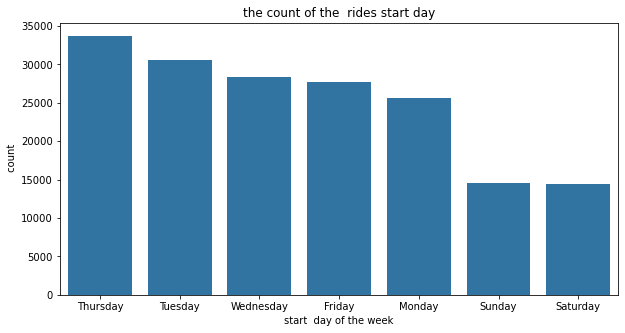

In [19]:
# the  rides  started  in every day of the week
plt.figure(figsize=(10,5))
freq = bikes1['start_day'].value_counts()

# Get the indexes of the Series to use ffor ordering  the bars
gen_order = freq.index
sb.countplot(data=bikes1, x='start_day', color=color,order=gen_order)
plt.xlabel('start  day of the week')
plt.ylabel(' count')
plt.title('the count of the  rides start day');

  as shown above,  the users make more trips on the week  days  and  the weekends are the least days  with  trips made. The  most  weekday  regarding trip counts is  Thursday  followed by  Tuesday  and  so on.

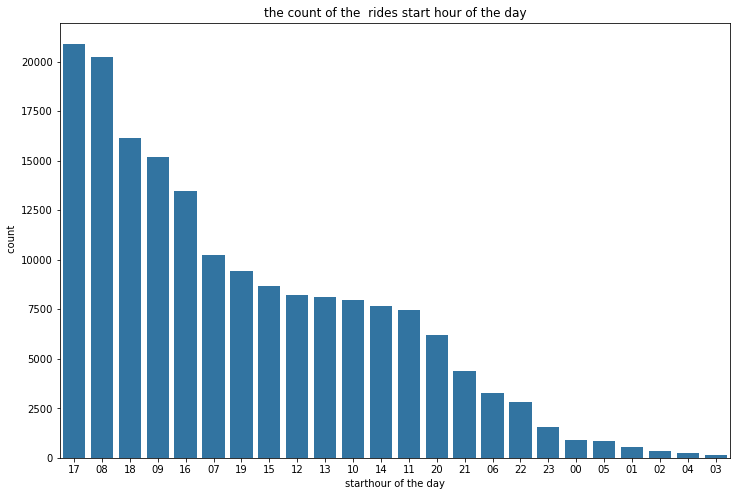

In [20]:
plt.figure(figsize=(12,8))
freq = bikes1['start_hour'].value_counts()

# Get the indexes of the Series to order them
gen_order = freq.index
sb.countplot(data=bikes1, x='start_hour', color=color,order=gen_order)
plt.xlabel('starthour of the day')
plt.ylabel(' count')
plt.title('the count of the  rides start hour of the day');

 as shown above, the  rush hours of the day with most  trips made are  at  5 pm followed by 8 am  which are the  times of  going and coming back  from work where all people are  going  outside. then  the  following  times  are  adjacent  to the  rush  hours, namely  at  6 pm ,9 am and  4 pm. This shows that the  starting  hour  of the day  has a strong effect on the number of the hours

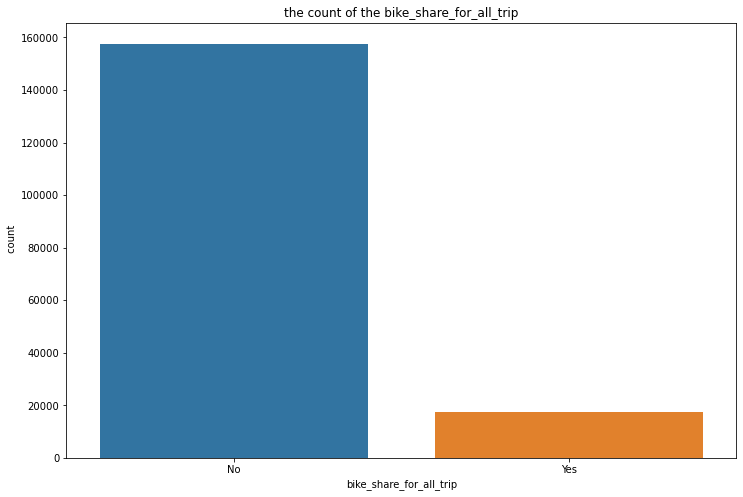

In [21]:
plt.figure(figsize=(12,8))
freq = bikes1['bike_share_for_all_trip'].value_counts()

# Get the indexes of the Series
gen_order = freq.index
sb.countplot(data=bikes1, x='bike_share_for_all_trip',order=gen_order)
plt.xlabel('bike_share_for_all_trip')
plt.ylabel(' count')
plt.title('the count of the bike_share_for_all_trip');

most of the  trips  don't  include sharing bikes  for all the  trip as shown in the  barplot above

Text(0.5, 1.0, 'the percentage of the users based on bike share for all trip')

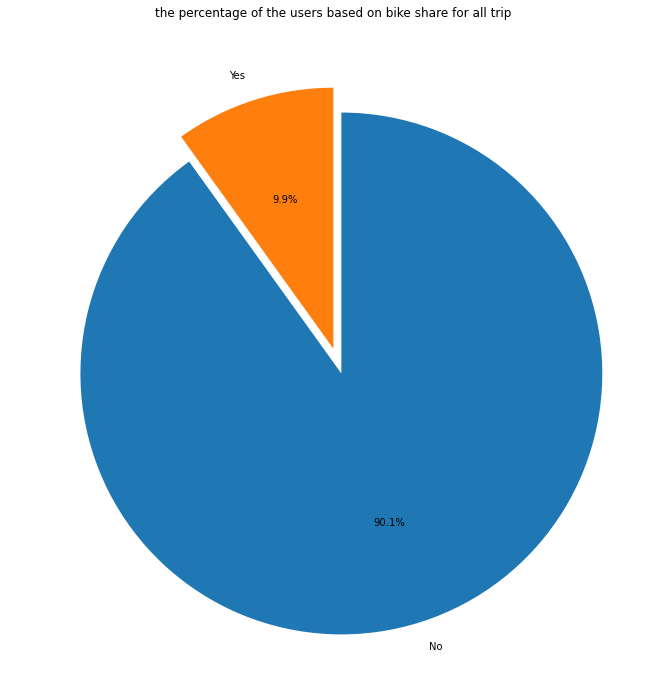

In [22]:
#pie  chart  to show the percentage of the  bike  rides based on the bike share  for all the  trip
plt.figure(figsize=(12,12))
sorted_counts = bikes1['bike_share_for_all_trip'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False,autopct='%1.1f%%', explode=(0.1,  0),);
plt.title('the percentage of the users based on bike share for all trip')

# summary of the Univariate exploration:
as shown before, there are many factors that can  affect the  number of  trips made as  follows:
1)  age : most of the  trips were made by  young  people  between  25  and  35  years old;
2) gender:  males tend to have  much more trips  compared  to  females;
3) starting  hour:  the rush hours of the day  have more trips followed by the  adjacent  hours to the rush hours;
4) starting day: the weekdays  tend to have more  trips  compared to teh  weekends;
5) user type: most of the  trips webe made by the subscribers  compared to the  customers;
6) Duration : most of the trips are  considered as short trips  between 5 and  10 mins;
In the following  section, We will  explore if there  are relations between these variables;

# Bivariate  Exploration

Text(0.5, 1.0, ' relationship between the  age of the users  and the use type')

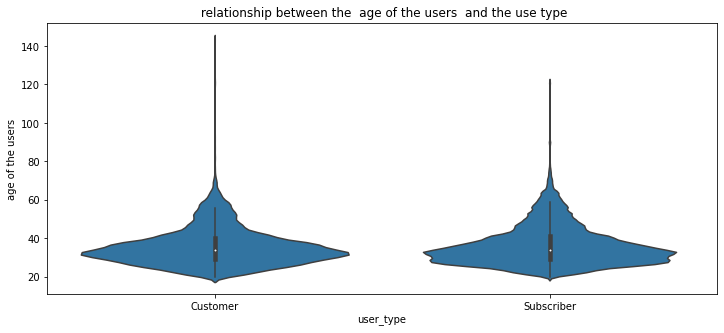

In [23]:
#  violin plot  to show relationship between the  age of the users  and the use type
plt.figure(figsize=(12,5))
sb.violinplot(data=bikes1, x='user_type', y='age', color=color, innner='quartile')
plt.xlabel('user_type')
plt.ylabel('age of the users')
plt.title(' relationship between the  age of the users  and the use type')



As shown  above, both  user types' data points  are  in the same range of  age, this is  because  most of the  users  are   young between the ages25 and 35 so  there is no relation between the  2 variables

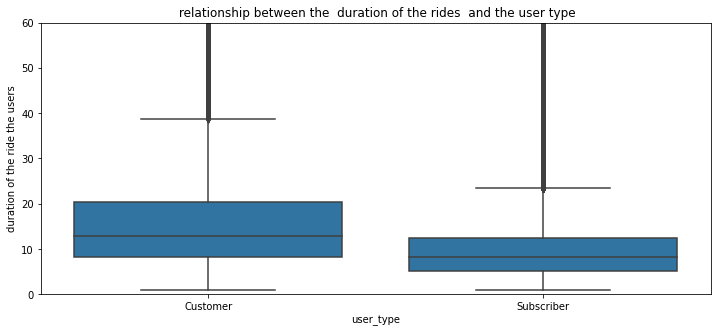

In [24]:
#box plot  to show relationship between the  duration of the rides  and the user type
plt.figure(figsize=(12,5))
ax1=sb.boxplot(data=bikes1, x='user_type', y='duration_min', color=color)
ax1.set_ylim(0,60)

plt.xlabel('user_type')
plt.ylabel('duration of the ride the users')
plt.title(' relationship between the  duration of the rides  and the user type');



although most of the users who make  rides are of the  subscriber  type, the  users  with  customer type tend  to have a larger  ride  duration  than the subscriber type. this can be shown by the  boxes size 

Text(0.5, 1.0, ' relationship between the  duration of the rides  and the gender')

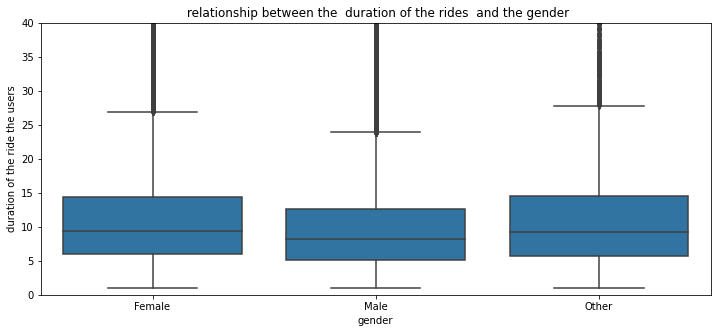

In [25]:
plt.figure(figsize=(12,5))

ax1=sb.boxplot(data=bikes1, x='member_gender', y='duration_min', color=color)
ax1.set_ylim(0,40)
plt.xlabel('gender')
plt.ylabel('duration of the ride the users')
plt.title(' relationship between the  duration of the rides  and the gender')



although most of the  ride makers are males, the females and the  other genders tend  to  have  more  duration than  male users( despite the  difference is not significant), this is obvious  from the  boxes  sizes

Text(0.5, 1.0, ' relationship between the duration of the bikes and bike_share_for_all_trip  ')

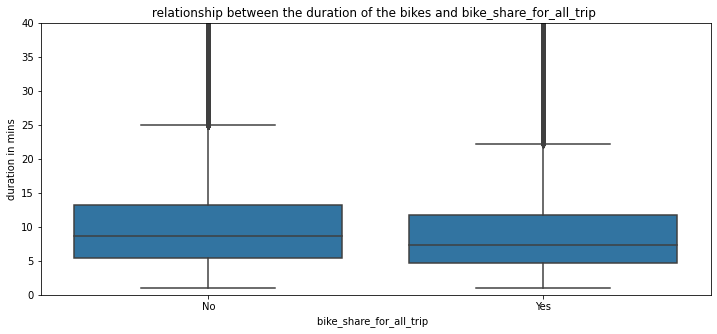

In [26]:
plt.figure(figsize=(12,5))
ax2=sb.boxplot(data=bikes1, x='bike_share_for_all_trip', y='duration_min', color=color,)
ax2.set_ylim(0,40)

plt.xlabel('bike_share_for_all_trip  ')
plt.ylabel('duration in mins')
plt.title(' relationship between the duration of the bikes and bike_share_for_all_trip  ')

 there is a  slight  increase in  duration  time  for the  segment of users  who don't share the  bike for all trip compared to   those who share.

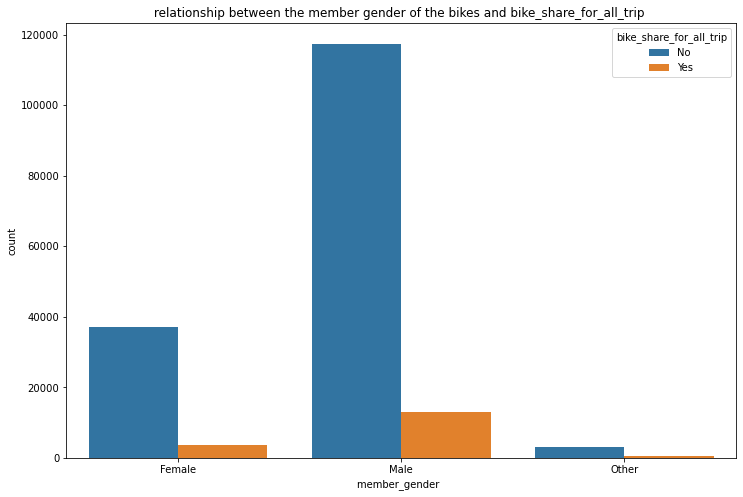

In [27]:
plt.figure(figsize=(12,8))
sb.countplot(data = bikes1, x = 'member_gender', hue = 'bike_share_for_all_trip')
plt.xlabel('member_gender  ')

plt.title(' relationship between the member gender of the bikes and bike_share_for_all_trip  ');

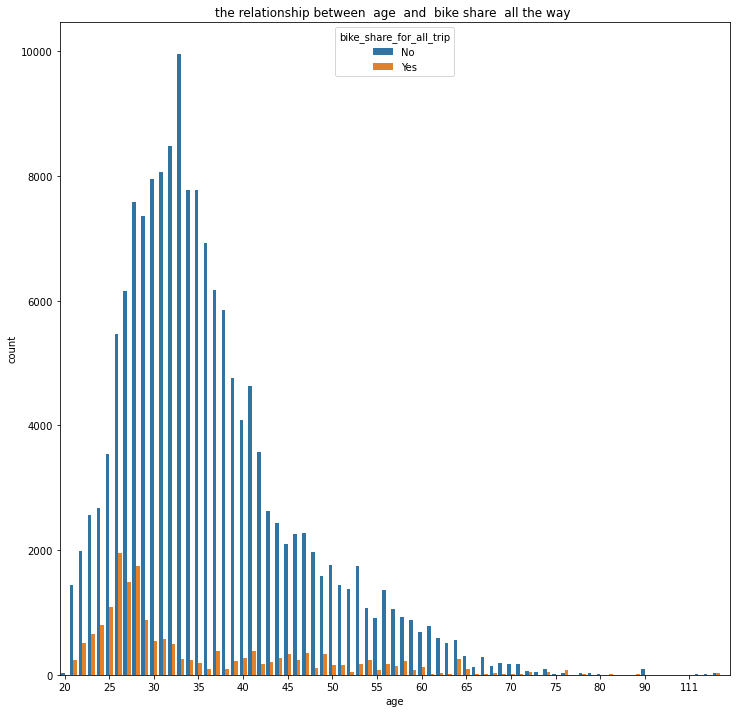

In [28]:
#checking the relationship between  age  and  bike share  all the way 
plt.figure(figsize=(12,12))
ticks=np.arange(0,70+5,5)

sb.countplot(data = bikes1, x = 'age', hue = 'bike_share_for_all_trip')
plt.title('the relationship between  age  and  bike share  all the way ')
plt.xticks(ticks);


there is no obvious  effect  of age on   the bike share all the trip, as shown  in the  plot  above, the  young ages  tend  to have more shares and more No_shares  than the older agers  since most of the  vike rides are  made by the  younger users

In [29]:
bikes1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 26 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

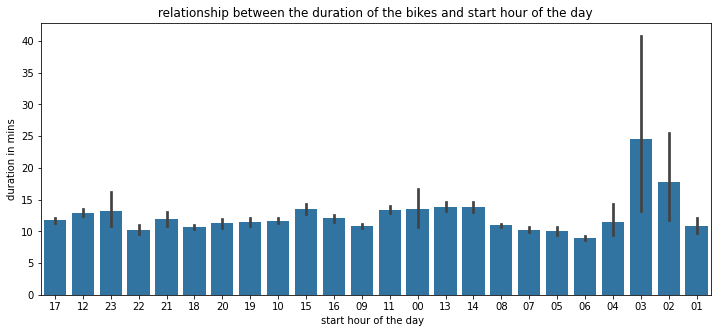

In [30]:
# relationship between  the duration  of the  rides  and the start hour of day
plt.figure(figsize=(12,5))
sb.barplot(data=bikes1, x='start_hour', y='duration_min', color=color);
ax2.set_ylim(0,40)

plt.xlabel('start hour of the day  ')
plt.ylabel('duration in mins')
plt.title(' relationship between the duration of the bikes and start hour of the day ');

alrhoughmost of the trips  were made  in the  rush  hours  at  8   am and  5 pm, the longest trip durations are made after midnight at  3 am  with  duration of  25  mins followed  by  2  am  with  duration of 18  mins.

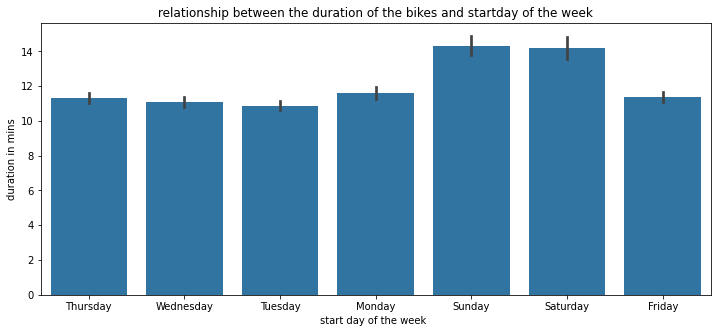

In [31]:
#relationship between the duration of the bikes and startday of the week
plt.figure(figsize=(12,5))
sb.barplot(data=bikes1, x='start_day', y='duration_min', color=color);
ax2.set_ylim(0,50)

plt.xlabel('start day of the week  ')
plt.ylabel('duration in mins')
plt.title(' relationship between the duration of the bikes and startday of the week ');

although the number  of  rides made on weekdays is more than  weekends, the duration of the trips on weekends  tend  to be higher than the other days, this  is  obvious from the  bar chart  above.

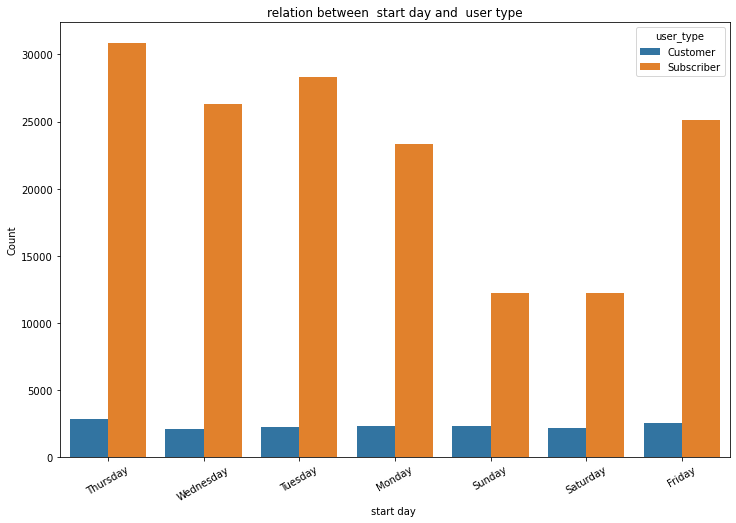

In [32]:
#relation between  start day and  user type
plt.figure(figsize=(12,8))
sb.countplot(data=bikes1, x='start_day', hue='user_type')
plt.xticks(rotation=30)
plt.xlabel('start day ')
plt.ylabel('Count')
plt.title('relation between  start day and  user type');

most of the users  who make rides   during the week are  of the subscriber  type compared to teh customer  type

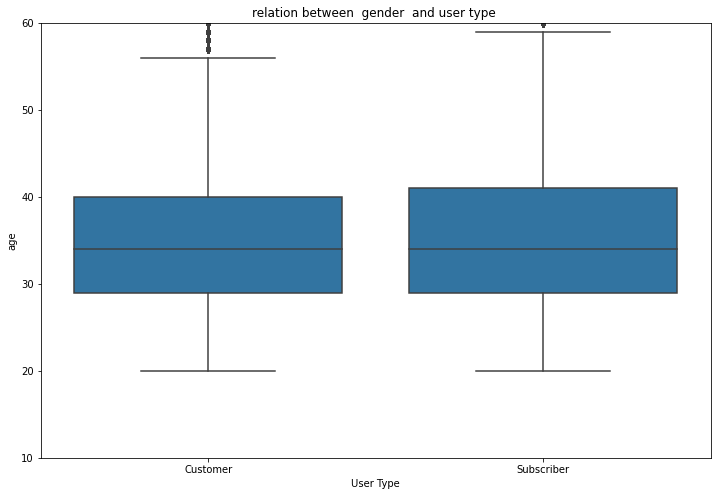

In [33]:
# relation between  gender  and user type 
plt.figure(figsize=(12,8))
ax=sb.boxplot(data=bikes1, x='user_type', y='age', color=color)
ax.set_ylim(10,60)
plt.xlabel('User Type')
plt.ylabel('age')
plt.title('relation between  gender  and user type ');



 the subscriber  type tend  to have a  slightly  larger range  of ages  compared  to the  customer type

# Bivariate exploration  summary:
In this section  I  checked the relations between pairs of  variables  and I found the  following  conclusions:
1)  the users of the customer  type tend  to have more  rides' duration compared  to the  subscribers
2) females  tend to  have  more   rides'  duration  compared  to males
3)  the  longest  durations  are made  after midnight at  3 am  followed by  2  am 
4)  the dongest  durations  are made  on weekends more than weekdays
5)  users  who  tend not  to share  bikes all the day  have more   trip duration  compared  to users  who  do
6)  the subscriber  type tend  to have a  slightly  larger range  of ages  compared  to the  customer type



# Multivariate  exploration

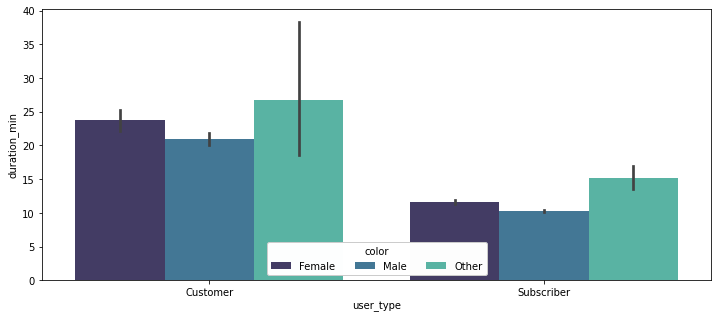

In [34]:
plt.figure(figsize=(12,5))

ax = sb.barplot(data = bikes1, x = 'user_type', y = 'duration_min', hue = 'member_gender',palette='mako')
ax.legend(loc = 8, ncol = 7, framealpha = 2, title = 'color');

it seems  to have the  other gender types  tend  to   spend more time in  bike  rides   in both  customer and subscriber  user types followe by  females  and    males

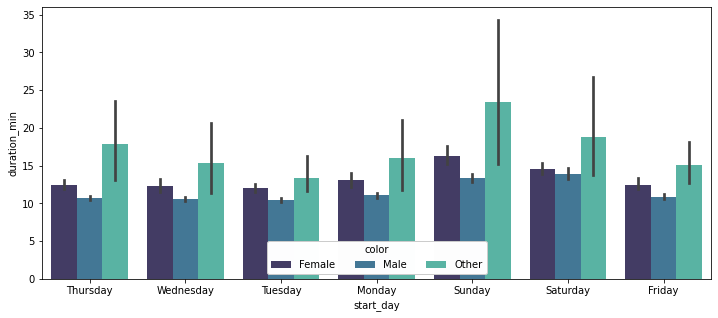

In [35]:
plt.figure(figsize=(12,5))

ax = sb.barplot(data = bikes1, x = 'start_day', y = 'duration_min', hue = 'member_gender',palette='mako')
ax.legend(loc = 8, ncol = 7, framealpha = 2, title = 'color');

again it seems  that the  other gender type affects the duration and having the  largest trip duration . Furtherm sunday seems to have the largest  duration  for all the  gender types


Text(0.5, 1.0, ' duration  in min for all  genders  throuhout the  day hours')

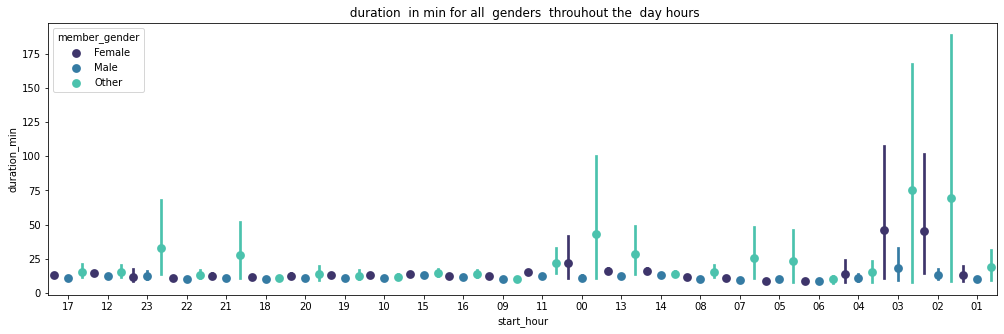

In [36]:
plt.figure(figsize=(17,5))

sb.pointplot(data = bikes1, x = 'start_hour', y = 'duration_min', hue = 'member_gender',
                  dodge = 0.7, linestyles = "",palette = 'mako')
plt.title(' duration  in min for all  genders  throuhout the  day hours')

 as shown in the point plot, the other gender type  tend to  have more  trip duration  compared to the other  genders , followed by  females and amles. Further, the max  hour to have  ride duration is after midnight at  3  am  and 2 am .

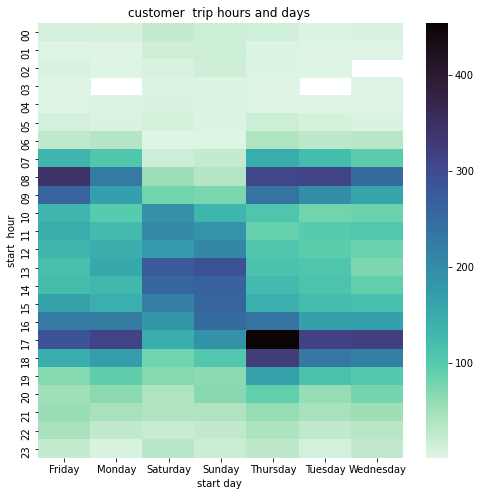

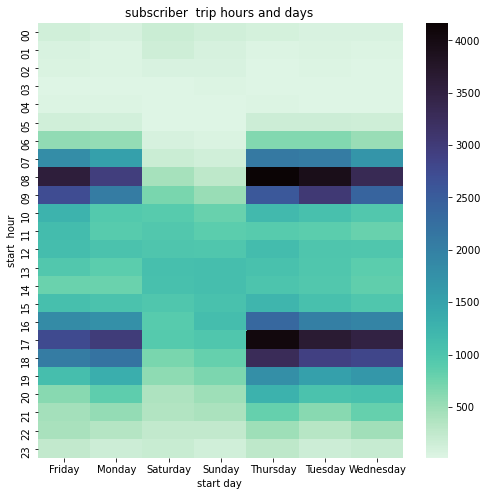

In [37]:
# reversing the  color bar 
color_map = plt.cm.get_cmap('mako')
reversed_color_map = color_map.reversed()
#first  sub heat map  for the customer user type
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)

customer = bikes1.query('user_type == "Customer"').groupby(['start_hour', 'start_day'])['bike_id'].size().reset_index();
customer = customer.pivot('start_hour', 'start_day', 'bike_id')
heat1 = sb.heatmap(customer, cmap = reversed_color_map)

plt.title('customer  trip hours and days ')
plt.xlabel('start day ',)
plt.ylabel('start  hour');

plt.show()

# second  sub heat map for the subscriber  users 
plt.figure(figsize=(18,8))

plt.subplot(1,2,2)

subscriber = bikes1.query('user_type == "Subscriber"').groupby(['start_hour', 'start_day'])['bike_id'].size().reset_index();
subscriber = subscriber.pivot('start_hour', 'start_day', 'bike_id')
heat2 = sb.heatmap(subscriber, cmap = reversed_color_map)

plt.title('subscriber  trip hours and days ')
plt.xlabel('start day ',)
plt.ylabel('start  hour');

plt.show()



as shown in the heat map,  the   customer  and  subscriber  users tend to have  their max  rides  at the  rush  hours(8 am,  and 17 pm) during the  whole week. However,   the  customer type  tend to have more   bike rides  during the weekends (Saturday and Sonday) compared to the  subscribers. Furher,  subscribers  tend to have more  rides  during the rush through the workdays compared to customers 

# Multivariate summary:
1)  Other gender types tend to spend more time in bike rides in both customer and subscriber user types followe by females and males
2)  other gender type affects the duration and having the largest trip duration . Furtherm sunday seems to have the largest duration for all the gender types
3)  the max hour to have ride duration is after midnight at 3 am and 2 am .
4) he customer and subscriber users tend to have their max rides at the rush hours(8 am, and 17 pm) during the whole week.
5)  the customer type tend to have more bike rides during the weekends (Saturday and Sonday) compared to the subscribers
